In [1]:
from google.colab import files
uploaded = files.upload()


Saving titanic.csv to titanic (1).csv


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline


In [3]:
# Load CSV where real header is in the 2nd row (index 1)
df = pd.read_csv("titanic.csv", header=1)

# Optional: rename for consistent column names
df.columns = ['sn', 'pclass', 'survived', 'name', 'gender', 'age', 'family', 'fare', 'embarked', 'date']

# Show preview
df.head()


,sn,pclass,survived,name,gender,age,family,fare,embarked,date
0,1,3,0,Mr. Anthony,male,42,0.0,7.55,NaN,01-Jan-90
1,1,3,0,Mr. Anthony,male,42,0.0,7.55,NaN,01-Jan-90
2,2,3,0,Master. Eugene Joseph,male,?,2.0,20.25,S,02-Jan-90
3,3,2,0,"Abbott, Mr. Rossmore Edward",NaN,NaN,2.0,**,S,03-Jan-90
4,4,3,1,"Abbott, Mr. Rossmore Edward",female,35,2.0,20.25,S,04-Jan-90


In [4]:
# Replace bad values with NaN
df.replace(['?', '**', ''], np.nan, inplace=True)

# Convert types
df['age'] = pd.to_numeric(df['age'], errors='coerce')
df['family'] = pd.to_numeric(df['family'], errors='coerce')
df['fare'] = pd.to_numeric(df['fare'], errors='coerce')
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Summary
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1301 entries, 0 to 1300
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   sn        1301 non-null   int64         
 1   pclass    1301 non-null   int64         
 2   survived  1301 non-null   int64         
 3   name      1301 non-null   object        
 4   gender    1300 non-null   object        
 5   age       1043 non-null   float64       
 6   family    1299 non-null   float64       
 7   fare      1298 non-null   float64       
 8   embarked  1295 non-null   object        
 9   date      1301 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(3), object(3)
memory usage: 101.8+ KB


/tmp/ipython-input-4-2680195283.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date'] = pd.to_datetime(df['date'], errors='coerce')


In [5]:
df.isnull().sum()


,0
sn,0
pclass,0
survived,0
name,0
gender,1
age,258
family,2
fare,3
embarked,6
date,0


In [6]:
# Drop rows with ANY missing values
df.dropna(inplace=True)

# Confirm it's clean now
df.isnull().sum()


,0
sn,0
pclass,0
survived,0
name,0
gender,0
age,0
family,0
fare,0
embarked,0
date,0


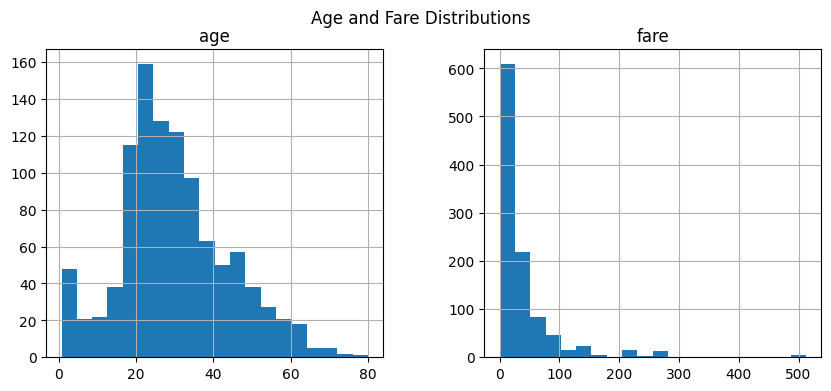

In [7]:
df[['age', 'fare']].hist(bins=20, figsize=(10, 4))
plt.suptitle("Age and Fare Distributions")
plt.show()


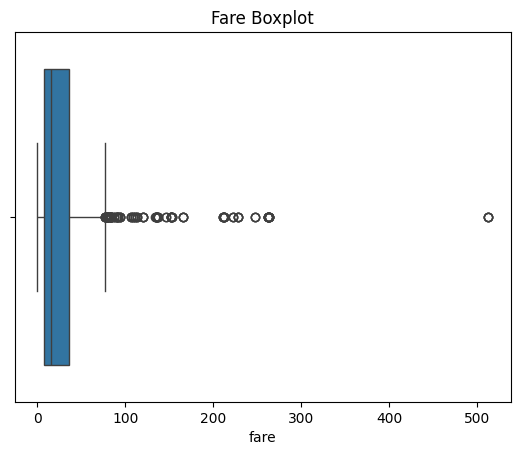

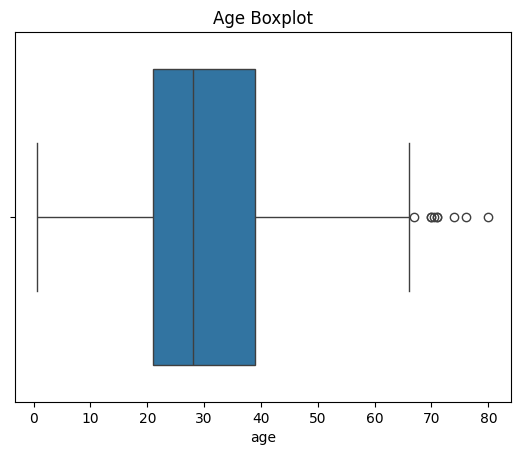

In [8]:
sns.boxplot(x=df['fare'])
plt.title("Fare Boxplot")
plt.show()

sns.boxplot(x=df['age'])
plt.title("Age Boxplot")
plt.show()


In [9]:
def detect_outliers(column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[column] < Q1 - 1.5 * IQR) | (df[column] > Q3 + 1.5 * IQR)]
    print(f"\nOutliers in '{column}': {len(outliers)}")
    print(f"  Below {Q1 - 1.5*IQR:.2f}, Above {Q3 + 1.5*IQR:.2f}")

detect_outliers('age')
detect_outliers('fare')



Outliers in 'age': 9
  Below -6.00, Above 66.00

Outliers in 'fare': 129
  Below -33.12, Above 76.67


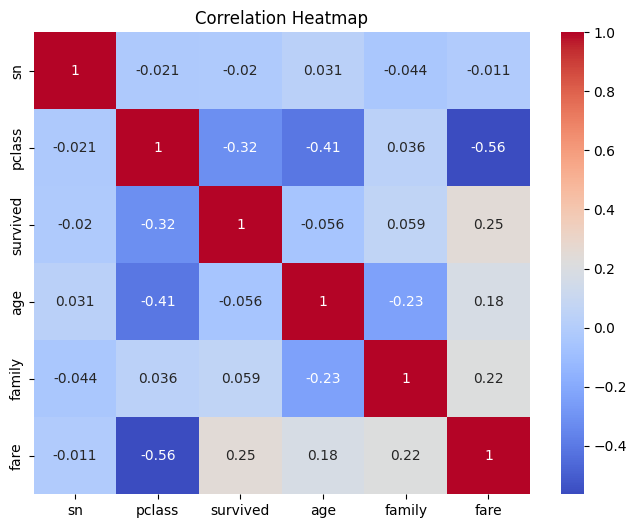

In [10]:
numeric_df = df.select_dtypes(include=[np.number])
corr = numeric_df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


In [12]:
def analyze_correlation(df, threshold=0.8):
    numeric_df = df.select_dtypes(include=[np.number])
    corr_matrix = numeric_df.corr()

    # Heatmap
    plt.figure(figsize=(10, 7))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title("Correlation Heatmap")
    plt.show()

    # Find highly correlated pairs
    high_corr_pairs = []
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            corr_value = corr_matrix.iloc[i, j]
            if abs(corr_value) > threshold:
                col1 = corr_matrix.columns[i]
                col2 = corr_matrix.columns[j]
                high_corr_pairs.append((col1, col2, corr_value))

    # Show Recommendations
    if high_corr_pairs:
        print(f"\nHighly correlated feature pairs (>|{threshold}|):")
        for col1, col2, val in high_corr_pairs:
            print(f"   - {col1} vs {col2} → Correlation: {val:.2f}")

        print("\nRecommendation:")
        print("Consider dropping one of each highly correlated pair to reduce redundancy.")
    else:
        print("\nNo highly correlated feature pairs found.")

    return high_corr_pairs


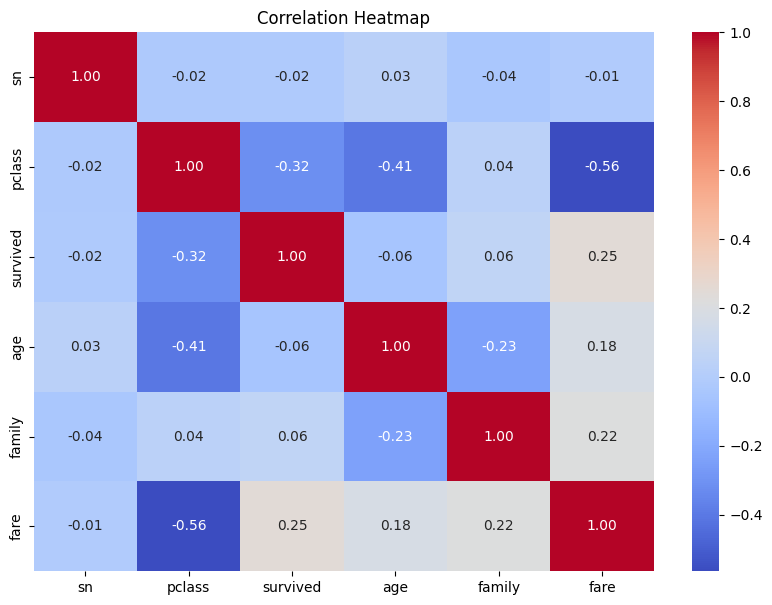


No highly correlated feature pairs found.


In [13]:
correlated_features = analyze_correlation(df)
